# **1. Pendahuluan**
Logistic Regression adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas suatu kelas berdasarkan fitur input. Algoritma ini cocok untuk masalah klasifikasi biner, seperti mendeteksi adanya penyakit jantung berdasarkan parameter medis.

Fungsi dasar dalam Logistic Regression adalah:

$P(Y=1|X) = \frac{1}{1 + e^{- (\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n) }}$

# **2. Dataset**

Dataset yang digunakan adalah HeartDisease.csv, yang berisi berbagai parameter kesehatan untuk memprediksi kemungkinan seseorang terkena penyakit jantung.


In [26]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/My Drive/HeartDisease.csv'  # Sesuaikan path dengan lokasi file di Drive
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Preprocessing Data**
Langkah preprocessing meliputi:

* Menghapus nilai yang hilang
* Normalisasi fitur numerik
* Membagi dataset menjadi data latih dan data uji

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Menghapus nilai yang hilang
df.dropna(inplace=True)

# Memisahkan fitur dan target
# Check the actual column names in your DataFrame using df.columns
# If the target column name is different (e.g., 'Target'), update the code below
X = df.drop(columns=['num'])  # Replace 'target' with the correct column name
y = df['num']  # Replace 'target' with the correct column name

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **4. Membuat Model Logistic Regression**

Menggunakan `LogisticRegression` dari Scikit-learn:

In [28]:
from sklearn.linear_model import LogisticRegression

# Membuat model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

 # **5. Evaluasi Model**
  ## **Akurasi**
  Akurasi mengukur seberapa sering model memprediksi dengan benar dari keseluruhan data.


  $\text{Akurasi} = \frac{TP + TN}{TP + TN + FP + FN}$


  Di mana:
  * TP (True Positive): Jumlah kasus positif yang diprediksi dengan benar.
  * TN (True Negative): Jumlah kasus negatif yang diprediksi dengan benar.
  * FP (False Positive): Jumlah kasus negatif yang salah diprediksi sebagai positif.
  * FN (False Negative): Jumlah kasus positif yang salah diprediksi sebagai negatif.

Semakin tinggi nilai akurasi, semakin baik model dalam mengklasifikasikan data.

  ## **Presisi**
  Presisi mengukur seberapa akurat model dalam memprediksi kelas positif.

  $\text{Presisi} = \frac{TP}{TP + FP}$

  Presisi tinggi berarti bahwa dari semua kasus yang diprediksi sebagai positif, sebagian besar benar-benar positif. Metrik ini penting dalam kasus di mana kesalahan False Positive harus diminimalkan.

  ## **Recall**
  Recall mengukur seberapa baik model dalam menemukan semua kasus positif.

  $\text{Recall} = \frac{TP}{TP + FN}$

  Recall tinggi menunjukkan bahwa model dapat menangkap sebagian besar kasus positif. Recall lebih diutamakan dalam situasi di mana kesalahan False Negative memiliki dampak yang besar, seperti dalam diagnosis penyakit.

  ## **F1-Score**
  F1-Score adalah rata-rata harmonik antara presisi dan recall, berguna untuk menyeimbangkan keduanya.

  $F1 = 2 \times \frac{\text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}$

  F1-Score digunakan ketika dataset memiliki distribusi kelas yang tidak seimbang, karena mempertimbangkan baik False Positives maupun False Negatives.

  ## **AUC dan ROC**
  AUC adalah area di bawah kurva ROC, yang mengukur seberapa baik model dapat membedakan antara dua kelas.




Akurasi: 0.6166666666666667
Presisi: 0.5605297157622737
Recall: 0.6166666666666667
F1-Score: 0.5782139379607736
AUC: 0.7622020961916107


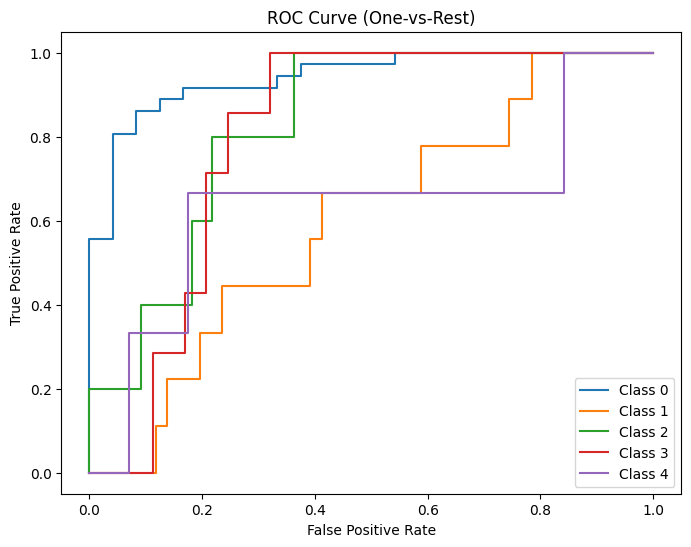

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)  # Gunakan semua probabilitas, bukan hanya kelas ke-1

# Evaluasi metrik untuk data multi-kelas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Sesuaikan untuk multi-kelas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # Multi-class AUC

print(f'Akurasi: {accuracy}')
print(f'Presisi: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC: {auc}')

# Binarisasi target untuk multi-kelas
y_test_binarized = label_binarize(y_test, classes=model.classes_)

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))

for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()
